Problem Statement
Beta Bank customers are leaving: little by little, chipping away every month. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on
clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1
score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.
1. Download and prepare the data. Explain the procedure.
2. Examine the balance of classes. Train the model without taking into account the
imbalance. Briefly describe your findings.
3. Improve the quality of the model. Make sure you use at least two approaches to
fixing class imbalance. Use the training set to pick the best parameters. Train
different models on training and validation sets. Find the best one. Briefly
describe your findings.
4. Perform the final testing.


1.Download and prepare the data. Explain the procedure.

In [1]:
#Downloading and preparing the data
import pandas as pd
beta_df = pd.read_csv('https://bit.ly/2XZK7Bo')
beta_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [2]:
#Dropping duplicates and missing data
beta_df = beta_df.drop_duplicates()

#missing data
total = beta_df.isnull().sum().sort_values(ascending=False)
percent = (beta_df.isnull().sum()/beta_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#From the below observation, we have about 909 missing data, tenure is a key feature in predicting whether the customer exited, i choose to omit the rows with missing data on teure

,Total,Percent
Tenure,909,0.0909
RowNumber,0,0.0000
CustomerId,0,0.0000
Surname,0,0.0000
CreditScore,0,0.0000
Geography,0,0.0000
Gender,0,0.0000
Age,0,0.0000
Balance,0,0.0000
NumOfProducts,0,0.0000


In [3]:
#Dropping missing values , these account for approximately 9%

beta_df.dropna(axis=0, inplace=True)
beta_df.shape

(9091, 14)

In [4]:
#Checking the status of the data again after dropping the missing data
total = beta_df.isnull().sum().sort_values(ascending=False)
percent = (beta_df.isnull().sum()/beta_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [5]:
#dropping the surname, customer ID and row number columns, these are not important in determining of a customer will stay or not

# Remove two columns name is 'C' and 'D'
beta_df.drop(['RowNumber', 'CustomerId','Surname'], axis = 1,inplace=True)
beta_df.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
#Label Encoding for gender and Geography columns

#preprocessing
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
beta_df.Geography=le.fit_transform(beta_df.Geography)
beta_df.Gender=le.fit_transform(beta_df.Gender)

beta_df.head(5)





,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
beta_df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,0.746783,0.547135,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,0.826879,0.497801,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,1.000000,1.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [86]:
#Plotting the ROC curve as well as checking the area under the curve

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


my_target = beta_df['Exited']
my_features = beta_df.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    my_features, my_target, test_size=0.25, random_state=12345
)

#ROC_AUC Logistic Regression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

#ROC_AUC Random Classifier
model_2a = RandomForestClassifier(random_state=222, max_depth=4, n_estimators=3)
model_2a.fit(features_train, target_train)
probabilities_valid_2a = model_2a.predict_proba(features_valid)
probabilities_one_valid_2a = probabilities_valid_2[:, 1]
auc_roc_2a = roc_auc_score(target_valid, probabilities_one_valid_2a)

#ROC_AUC Random Forest
model_2b = RandomForestClassifier(random_state=222, max_depth=4, n_estimators=1)
model_2b.fit(features_train, target_train)
probabilities_valid_2b = model_2b.predict_proba(features_valid)
probabilities_one_valid_2b = probabilities_valid_2b[:, 1]
auc_roc_2b = roc_auc_score(target_valid, probabilities_one_valid_2b)


print('AUC_ROC Logistic Regression: ', auc_roc)
print('AUC_ROC Decision Tree: ', auc_roc_2a)
print('AUC_ROC Random Forest: ', auc_roc_2b)

#The area under the ROC curve as per the belo findings was highest using the decision tree classifier after tuning the hyper parameters

AUC_ROC Logistic Regression:  0.663079484302477
AUC_ROC Decision Tree:  0.8353013549594632
AUC_ROC Random Forest:  0.804987574873254


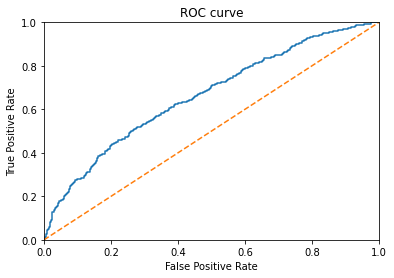

In [81]:
#ROC Curve Logistic Regression
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.show()

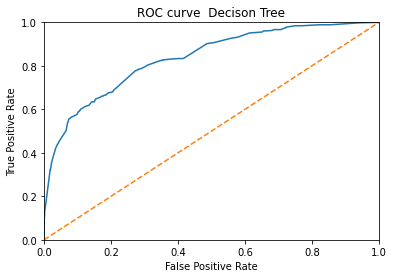

In [87]:
#ROC Curve Decision Tree
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_2a)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  Decison Tree')
plt.show()

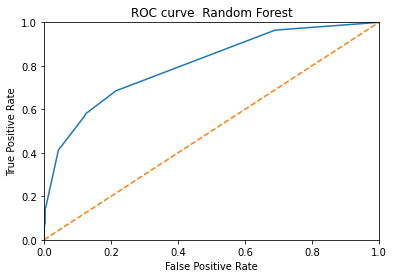

In [88]:
#ROC Curve Random Forest
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_2b)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  Random Forest')
plt.show()

Conclusion :From the above three models, its evident that the Decison tree curve is the highest area under ROC compared to the other two models

**2. Examine the balance of classes. **

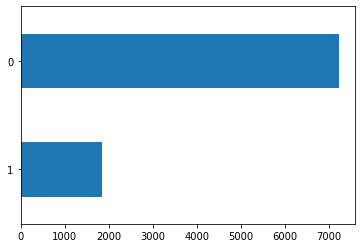

In [7]:
#Visual representation of the raw data values in the exit(target) column
beta_df.Exited.value_counts().sort_values().plot(kind = 'barh')

Conclusion: It is clear that the positive and negative values on the raw data are quite unbalanced as per the above visual representation.

**Train the model without taking into account the imbalance. Briefly describe your findings.**

In [34]:
#Splitting the data and training  the model using unbalanced/unweighted data set
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


target = beta_df['Exited']
features = beta_df.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

#Logistic Regression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid_1 = model.predict(features_valid)
acc_1 = accuracy_score(target_valid,predicted_valid_1)

#Decision Tree
model_2 = DecisionTreeClassifier(random_state=111,max_depth = 4)
model_2.fit(features_train, target_train)
predicted_valid_2 = model_2.predict(features_valid)
acc_2 = accuracy_score(target_valid,predicted_valid_2)

#Random_Forest
model_3 = RandomForestClassifier(random_state=222, max_depth=4, n_estimators=1)
model_3.fit(features_train, target_train)
predicted_valid_3 = model_3.predict(features_valid)
acc_3 = accuracy_score(target_valid,predicted_valid_3)


#Accuracy and F1 Scores
print("F1  Scores")
print("----------------------")
print('F1_Score_Logistic_Regression:', f1_score(target_valid, predicted_valid_1))
print('F1_Decision_Tree:', f1_score(target_valid, predicted_valid_2))
print('F1_Random_Forest:', f1_score(target_valid, predicted_valid_3))


print('\nAccuracy')
print("---------------------------")
print('Accuracy_Logistic_Regression:', acc_1)
print('Accuracy_Decision_Tree:', acc_2)
print('Accuracy_Random_Forest:', acc_3)





F1  Scores
----------------------
F1_Score_Logistic_Regression: 0.008733624454148471
F1_Decision_Tree: 0.543661971830986
F1_Random_Forest: 0.5202797202797204

Accuracy
---------------------------
Accuracy_Logistic_Regression: 0.8002639683238011
Accuracy_Decision_Tree: 0.8574571051473823
Accuracy_Random_Forest: 0.8490981082270127


In [ ]:
#The three models scored poorly on both the F1_Score and the accuracy, logistic regression had the lowest at 0.008
#ironically the accuracy for logistic regression was 80%
#This further proves the weight imbalance in our data

In [36]:
#Checking the performance of the models after using the class_weight='balanced' hyperparameter

#Logistic Regression
model = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid_1 = model.predict(features_valid)
acc_1 = accuracy_score(target_valid,predicted_valid_1)

#Decision Tree
model_2 = DecisionTreeClassifier(random_state=111,class_weight='balanced', max_depth = 4)
model_2.fit(features_train, target_train)
predicted_valid_2 = model_2.predict(features_valid)
acc_2 = accuracy_score(target_valid,predicted_valid_2)

#Random_Forest
model_3 = RandomForestClassifier(random_state=222, max_depth=4,class_weight='balanced', n_estimators=3)
model_3.fit(features_train, target_train)
predicted_valid_3 = model_3.predict(features_valid)
acc_3 = accuracy_score(target_valid,predicted_valid_3)


print("F1  Scores")
print("----------------------")
print('F1_Score_Logistic_Regression:', f1_score(target_valid, predicted_valid_1))
print('F1_Decision_Tree:', f1_score(target_valid, predicted_valid_2))
print('F1_Random_Forest:', f1_score(target_valid, predicted_valid_3))


print('\nAccuracy')
print("---------------------------")
print('Accuracy_Logistic_Regression:', acc_1)
print('Accuracy_Decision_Tree:', acc_2)
print('Accuracy_Random_Forest:', acc_3)

F1  Scores
----------------------
F1_Score_Logistic_Regression: 0.4486525855790241
F1_Decision_Tree: 0.4791386271870794
F1_Random_Forest: 0.5420875420875422

Accuracy
---------------------------
Accuracy_Logistic_Regression: 0.6669599648042235
Accuracy_Decision_Tree: 0.6594808622965244
Accuracy_Random_Forest: 0.7606687197536296


In [ ]:
#There is significant improvement on the F1_Score of the three models after using the weight hyper parameter
#The random forest scored the highest F1_Score and accuracy

In [13]:
# Checking the distribution:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)
#from the below observation, we have uneven balance of ones and zeros.

(5415, 10)
(1403, 10)
(5415,)
(1403,)


In [62]:
#UPSAMPLING
repeat = 1
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)

(6818, 10)
(6818,)


In [63]:
#Checking the new data
target_upsampled.value_counts()

0    5415
1    1403
Name: Exited, dtype: int64

In [64]:
#Shuffling
from sklearn.utils import shuffle
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [75]:
#Retraining the models using Upsampled data and checking the performance

#Logistic Regression
model = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid_1 = model.predict(features_valid)
acc_1 = accuracy_score(target_valid,predicted_valid_1)

#Decision Tree
model_2 = DecisionTreeClassifier(random_state=111,class_weight='balanced', max_depth = 4)
model_2.fit(features_upsampled, target_upsampled)
predicted_valid_2 = model_2.predict(features_valid)
acc_2 = accuracy_score(target_valid,predicted_valid_2)

#Random_Forest
model_3 = RandomForestClassifier(random_state=222, max_depth=4,class_weight='balanced', n_estimators=5)
model_3.fit(features_upsampled, target_upsampled)
predicted_valid_3 = model_3.predict(features_valid)
acc_3 = accuracy_score(target_valid,predicted_valid_3)


#Accuracy and F1 Scores
print("F1  Scores")
print("----------------------")
print('F1_Score_Logistic_Regression:', f1_score(target_valid, predicted_valid_1))
print('F1_Decision_Tree:', f1_score(target_valid, predicted_valid_2))
print('F1_Random_Forest:', f1_score(target_valid, predicted_valid_3))


print('\nAccuracy')
print("---------------------------")
print('Accuracy_Logistic_Regression:', acc_1)
print('Accuracy_Decision_Tree:', acc_2)
print('Accuracy_Random_Forest:', acc_3)

F1  Scores
----------------------
F1_Score_Logistic_Regression: 0.4845748683220467
F1_Decision_Tree: 0.4791386271870794
F1_Random_Forest: 0.5780669144981413

Accuracy
---------------------------
Accuracy_Logistic_Regression: 0.6986361636603607
Accuracy_Decision_Tree: 0.6594808622965244
Accuracy_Random_Forest: 0.8002639683238011


In [ ]:
#Improvement witnessed after upsampling, the highest accuracy attained being 80% and f1_score of .58

In [50]:
#Downsampling & shuffling

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.5
)

In [51]:
#Checking the values
target_downsampled.value_counts()

0    2708
1    1403
Name: Exited, dtype: int64

In [78]:
#Checking the performance of the models on the downsampled data
#Logistic Regression
model = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid_1 = model.predict(features_valid)
acc_1 = accuracy_score(target_valid,predicted_valid_1)

#Decision Tree
model_2 = DecisionTreeClassifier(random_state=111,class_weight='balanced', max_depth = 4)
model_2.fit(features_downsampled, target_downsampled)
predicted_valid_2 = model_2.predict(features_valid)
acc_2 = accuracy_score(target_valid,predicted_valid_2)

#Random_Forest
model_3 = RandomForestClassifier(random_state=222, max_depth=4,class_weight='balanced', n_estimators=3)
model_3.fit(features_downsampled, target_downsampled)
predicted_valid_3 = model_3.predict(features_valid)
acc_3 = accuracy_score(target_valid,predicted_valid_3)


#Accuracy and F1 Scores
print("F1  Scores")
print("----------------------")
print('F1_Score_Logistic_Regression:', f1_score(target_valid, predicted_valid_1))
print('F1_Decision_Tree:', f1_score(target_valid, predicted_valid_2))
print('F1_Random_Forest:', f1_score(target_valid, predicted_valid_3))


print('\nAccuracy')
print("---------------------------")
print('Accuracy_Logistic_Regression:', acc_1)
print('Accuracy_Decision_Tree:', acc_2)
print('Accuracy_Random_Forest:', acc_3)


F1  Scores
----------------------
F1_Score_Logistic_Regression: 0.44752186588921283
F1_Decision_Tree: 0.48016139878950903
F1_Random_Forest: 0.5881168177240685

Accuracy
---------------------------
Accuracy_Logistic_Regression: 0.6665200175978883
Accuracy_Decision_Tree: 0.6599208095028597
Accuracy_Random_Forest: 0.8200615926088869


In [ ]:
#On downsampling, we are able to obtain the highest f1_score so far (0.59) and the highest model accuracy score of 82%
#Both scores were achieved by the Random_forest classifier

In [89]:
#Final Testing

#Downloading and preparing the data
import pandas as pd
beta_df = pd.read_csv('https://bit.ly/2XZK7Bo')

#Dropping duplicates and missing data
beta_df = beta_df.drop_duplicates()
beta_df.dropna(axis=0, inplace=True)
beta_df.shape

#Label Encoding for gender and Geography columns
#preprocessing
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

#dropping the surname, customer ID and row number columns, these are not important in determining of a customer will stay or not

# Remove two columns name is 'C' and 'D'
beta_df.drop(['RowNumber', 'CustomerId','Surname'], axis = 1,inplace=True)
beta_df.head(5)

# Converting string labels into numbers.
beta_df.Geography=le.fit_transform(beta_df.Geography)
beta_df.Gender=le.fit_transform(beta_df.Gender)

#Splitting the data and training  the model using unbalanced/unweighted data set
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


target = beta_df['Exited']
features = beta_df.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
#Downsampling & shuffling

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.5
)

#Random_Forest
model_3 = RandomForestClassifier(random_state=222, max_depth=4,class_weight='balanced', n_estimators=3)
model_3.fit(features_downsampled, target_downsampled)
predicted_valid_3 = model_3.predict(features_valid)
acc_3 = accuracy_score(target_valid,predicted_valid_3)

print('F1_Random_Forest:', f1_score(target_valid, predicted_valid_3))
print('Accuracy_Random_Forest:', acc_3)



F1_Random_Forest: 0.5881168177240685
Accuracy_Random_Forest: 0.8200615926088869


**Conclusion**
The raw data was unevenly weighted
Upsampling and downsampling techniques were both used to make the weight balance
Upsampling improved the f1_score but did not give us the minimun required score
Downsampling gave us the highest score using the random forest model
The accuracy of the models reduced when the weight balanced initiatives were done(upsampling and down sampling)

**Recommendation**
The best model to use as per our experimented data is the random forest
Thers is room to improve the f1_score and the accuracy through exploring other classification models and tuning the hyper parameters.